In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
restaurants_df = pd.read_csv('output/responses/batch1_restaurants_dataset.csv')

In [3]:
restaurants_df.shape

(1356, 17)

In [4]:
restaurants = restaurants_df.copy()

In [5]:
reviews_df = pd.read_csv('output/responses/batch1_reviews_dataset.csv')

In [6]:
reviews_df.shape

(563796, 16)

In [7]:
reviews = reviews_df.copy()

# Data Cleaning

## Drop unnnecessary columns

In [8]:
restaurants = restaurants.drop(columns=['Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'])

In [9]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_id       1356 non-null   object 
 1   name           1356 non-null   object 
 2   reviews        1356 non-null   int64  
 3   main_category  1334 non-null   object 
 4   categories     1334 non-null   object 
 5   main_rating    1356 non-null   float64
 6   address        1325 non-null   object 
 7   link           1356 non-null   object 
 8   review_photos  1356 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 95.5+ KB


In [10]:
restaurants.shape

(1356, 9)

## Fill NaN values

In [11]:
restaurants.isnull().sum()

place_id          0
name              0
reviews           0
main_category    22
categories       22
main_rating       0
address          31
link              0
review_photos     0
dtype: int64

In [12]:
restaurants.fillna({'address': 'Singapore'}, inplace=True)

In [13]:
restaurants.fillna({'main_category': 'Unknown'}, inplace=True)

In [14]:
restaurants.fillna({'categories': "['Unknown']"}, inplace=True)

In [15]:
restaurants.isnull().sum()

place_id         0
name             0
reviews          0
main_category    0
categories       0
main_rating      0
address          0
link             0
review_photos    0
dtype: int64

## Drop any duplicates

In [16]:
restaurants.drop_duplicates(inplace=True)

In [17]:
restaurants.shape

(1183, 9)

In [18]:
restaurants[restaurants.duplicated(keep=False)]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos


In [19]:
restaurants[restaurants.duplicated(subset=['place_id', 'name', 'reviews', 'address'])]

,place_id,name,reviews,main_category,categories,main_rating,address,link,review_photos
30,ChIJ3xYfCeAX2jERKAmAmjJ8oqU,57° Mala Xiang Guo @Ang Mo Kio,141,Restaurant,['Restaurant'],4.1,"4190 Ang Mo Kio Ave 6, #01-05 & #01-06 Broadwa...",https://www.google.com/maps/place/57%C2%B0+Mal...,['https://lh5.googleusercontent.com/p/AF1QipNf...
32,ChIJHxxkwXgZ2jERNAV3RV7e7co,57° Mala Xiang Guo @Shaw Plaza,106,Restaurant,['Restaurant'],4.3,"360 Balestier Rd, #02-20/21 Shaw Plaza, Singap...",https://www.google.com/maps/place/57%C2%B0+Mal...,['https://lh5.googleusercontent.com/p/AF1QipPJ...
34,ChIJJfttivEX2jERR5G6vyX9QrU,57˚ Mala Xiang Guo @Paya Lebar,78,Chinese restaurant,['Chinese restaurant'],3.8,"329 Upper Paya Lebar Rd, Singapore 534948",https://www.google.com/maps/place/57%CB%9A+Mal...,['https://lh5.googleusercontent.com/p/AF1QipMk...
66,ChIJHU61llYZ2jERmh0bexkGiJk,A-Mor Turkish Kebab (695 North bridge rd),304,Takeaways,['Takeaways'],4.4,"695 North Bridge Rd, Singapore 198674",https://www.google.com/maps/place/A-Mor+Turkis...,['https://lh5.googleusercontent.com/p/AF1QipOr...
190,ChIJaVJl-msZ2jERXPBXaaRx1Bk,A2B Veg Restaurant (Adyar Ananda Bhavan),1363,Indian restaurant,"['Indian restaurant', 'Indian sweets shop', 'I...",3.8,"276-278 Serangoon Rd, Singapore 218105",https://www.google.com/maps/place/A2B+Veg+Rest...,['https://lh5.googleusercontent.com/p/AF1QipOU...
286,ChIJYcB1XlQR2jER94t9qyQmDrs,922 Beng Cheng Hakka Ampang Yong Tau Fu,1161,Restaurant,['Restaurant'],3.6,"922 Upper Thomson Rd, Singapore 787118",https://www.google.com/maps/place/922+Beng+Che...,['https://lh5.googleusercontent.com/p/AF1QipMC...
289,ChIJPdfoslUR2jER-9QyDeC3Djo,928 Ngee Fou (Hakka) Ampang Yong Tou Fou,403,Hakka restaurant,['Hakka restaurant'],4.0,"930 Upper Thomson Rd, Singapore 787122",https://www.google.com/maps/place/928+Ngee+Fou...,['https://lh5.googleusercontent.com/p/AF1QipNr...
313,ChIJrUa0YOQZ2jERXJ1EFV1khMY,Ayam Penyet President - Vivocity,254,Restaurant,"['Restaurant', 'Halal restaurant', 'Indonesian...",4.1,"1 Harbourfront Walk Vivocity #B2-23F, 098585",https://www.google.com/maps/place/Ayam+Penyet+...,['https://lh5.googleusercontent.com/p/AF1QipO6...
365,ChIJuUYLNcYZ2jERXw5efR0uha4,Ballaji Bhawan,1913,Vegetarian restaurant,"['Vegetarian restaurant', 'Catering food and d...",4.4,"103 Syed Alwi Rd, Opp. Mustafa Gate No. 2, Sin...",https://www.google.com/maps/place/Ballaji+Bhaw...,['https://lh5.googleusercontent.com/p/AF1QipNC...
370,ChIJfY11rSsZ2jERDwt2_4ZB6IE,Bangkok Jam @ Great World,791,Thai restaurant,['Thai restaurant'],4.5,"1 Kim Seng Promenade, #02-127, Singapore 237994",https://www.google.com/maps/place/Bangkok+Jam+...,['https://lh5.googleusercontent.com/p/AF1QipP1...


In [20]:
restaurants = restaurants.drop_duplicates(subset=['place_id', 'name', 'reviews', 'address'])

In [21]:
restaurants.shape

(1134, 9)

## Remove non-dining establishments

In [23]:
main_categories = list(restaurants['main_category'])
main_categories = list(set(main_categories))
main_categories.sort()

In [24]:
main_categories

['Advertising agency',
 'Argentinian restaurant',
 'Art cafe',
 'Art museum',
 'Art studio',
 'Asian fusion restaurant',
 'Asian restaurant',
 'Association / Organization',
 'Authentic Japanese restaurant',
 'Açaí shop',
 'Bakery',
 'Bar',
 'Barbecue restaurant',
 'Beauty salon',
 'Bicycle club',
 'Bistro',
 'Branding agency',
 'Brazilian restaurant',
 'Buffet restaurant',
 'Burmese restaurant',
 'Business management consultant',
 'Butcher shop deli',
 'Cafe',
 'Cake shop',
 'Candle store',
 'Cantonese restaurant',
 'Car dealer',
 'Car wash',
 'Caterer',
 'Catering food and drink supplier',
 'Chettinad restaurant',
 'Chicken restaurant',
 "Children's clothing store",
 'Chinese Takeaway',
 'Chinese language school',
 'Chinese noodle restaurant',
 'Chinese restaurant',
 'Clothing store',
 'Coaching center',
 'Cocktail bar',
 'Coffee shop',
 'Coffee stand',
 'Coffee store',
 'Computer support and services',
 'Condominium complex',
 'Confectionery store',
 'Consultant',
 'Conveyor belt sus

In [25]:
len(main_categories)

185

In [48]:
cats_to_remove = sorted(['Advertising agency', 'Art museum', 'Art studio', 'Association / Organization', 'Beauty salon', 
                  'Bicycle club', 'Branding agency', 'Business management consultant', 'Candle store', 'Car dealer', 'Car wash', 'Caterer',
                  'Catering food and drink supplier', "Children's clothing store", 'Chinese Takeaway', 'Chinese language school', 'Clothing store', 
                  'Coaching center', 'Coffee store', 'Condominium complex', 'Consultant', 'Corporate office', 'Curtain and upholstery cleaning service',
                  'Dance school', 'Delivery Restaurant', 'Designer Clothing Shop', 'Diving center', 'E-commerce service', 'Education center',
                  'Event management company', 'Fish store', 'Food producer', 'Food products supplier', 'Freight forwarding service', 'Fruit wholesaler'
                  'Gift shop', 'Gourmet grocery store', 'Gym and Fitness Centre', 'Hawker Stall', 'Hawker center', 'Health and beauty shop', 
                  'Health food store', 'Holding company', 'Hotel', 'Housing development', 'Importer', 'Industrial Real Estate Agency', 'Industrial equipment supplier',
                  'Information services', 'Interior designer', 'Italian grocery store', 'Japanese confectionery shop', 'Jewelry store', 'Lodging',
                  'Marketing agency', 'Marketing consultant', 'Maternity store', 'Motorcycle rental agency', 'Movie rental store', 'Music producer',
                  'Pastry shop', 'Performing arts group', 'Pet Shop', 'Photography service', 'Property management company', 'Publisher', 'Real estate consultant',
                  'Recording studio', 'Religious organization', 'Restaurant supply store', 'Serviced accommodation', 'Takeaways', 'Tattoo and piercing shop',
                  'Tattoo shop', 'Tea store', 'Used clothing store', 'Video production service', 'Wellness center', 'Wellness program', 'Wine cellar', "Women's clothing store", 
                  'Bakery', 'Açaí shop', 'Ice cream shop', 'Shop', 'Gift shop', 'Food court', 'Fruit wholesaler', 'Confectionery store', 
                  'Computer support and services'])

In [50]:
cats_to_remove = [cat.lower() for cat in cats_to_remove]
mask = restaurants['main_category'].str.lower().isin(cats_to_remove)
restaurants = restaurants[~mask]
restaurants.shape

(882, 9)

# Basic Analysis

## Distribution of restaurants by ratings

### 🧑🏻‍🍳🧑🏻‍🍳 The average restaurant rating is 4; outliers range from rating of 0 to 3

In [51]:
restaurants['main_rating'].mean()

4.072448979591837

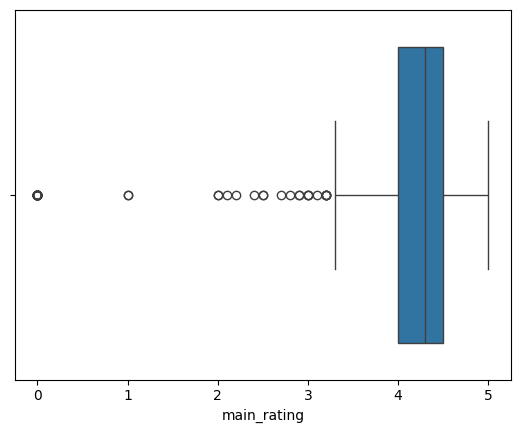

In [52]:
sns.boxplot(data=restaurants, x='main_rating');

### 🧑🏻‍🍳🧑🏻‍🍳 Majority of restaurants are rated 4.0 to 4.5

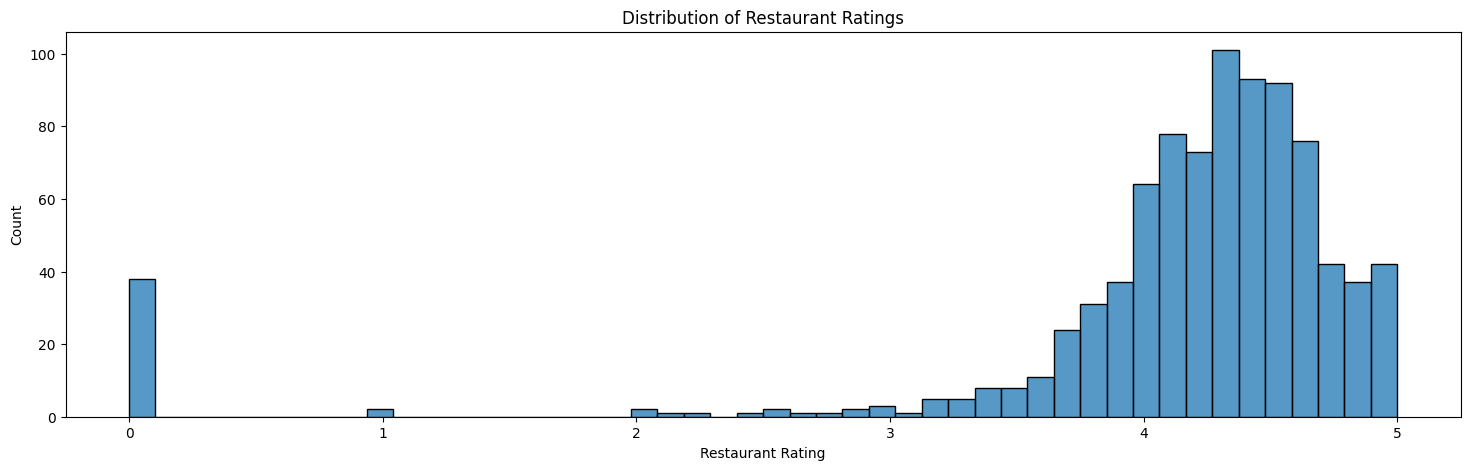

In [53]:
plt.figure(figsize=(18,5))
sns.histplot(data=restaurants, x='main_rating')
plt.xlabel('Restaurant Rating')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.show()

### 🧑🏻‍🍳🧑🏻‍🍳 There are 306 restaurants rated 4.5 and above

In [54]:
top_rated = restaurants[restaurants['main_rating']>=4.5].sort_values(by='reviews', ascending=False)

In [55]:
top_rated.shape

(289, 9)

## Analysis of Reviews by Ratings

### 🧑🏻‍🍳🧑🏻‍🍳 First we should drop outliers in the number of reviews

In [56]:
restaurants_sans_outliers = restaurants[restaurants['reviews']<=1000] # 75th percentile is 772
restaurants_sans_outliers.describe()

,reviews,main_rating
count,743.000000,743.000000
mean,281.187079,4.017362
std,276.019085,1.042394
min,0.000000,0.000000
25%,46.000000,4.000000
50%,179.000000,4.300000
75%,456.500000,4.500000
max,996.000000,5.000000


### 🧑🏻‍🍳🧑🏻‍🍳 Ave number of reviews for restaurants rated >4 is significantly more

In [57]:
mean_reviews = restaurants_sans_outliers.groupby('main_rating')['reviews'].mean()
mean_reviews

main_rating
0.0      0.000000
1.0      2.000000
2.0     12.500000
2.1     35.000000
2.2     18.000000
2.4     10.000000
2.5     42.500000
2.7     10.000000
2.8      4.000000
2.9     95.500000
3.0      4.666667
3.1     80.000000
3.2     89.200000
3.3    133.800000
3.4    145.875000
3.5     75.125000
3.6    240.900000
3.7    173.000000
3.8    188.740741
3.9    278.944444
4.0    254.677966
4.1    382.253968
4.2    415.258621
4.3    318.230769
4.4    389.547945
4.5    338.589041
4.6    363.896552
4.7    336.060606
4.8    252.935484
4.9    131.352941
5.0     26.000000
Name: reviews, dtype: float64

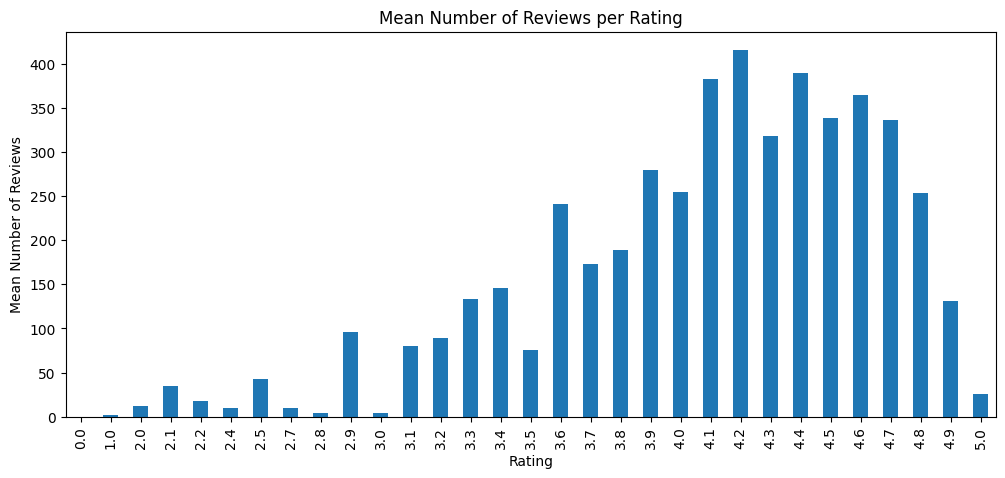

In [61]:
plt.figure(figsize=(12, 5))
mean_reviews.plot(kind='bar')
plt.title('Mean Number of Reviews per Rating')
plt.xlabel('Rating')
plt.ylabel('Mean Number of Reviews')
plt.xticks(rotation=90)
plt.show()

# Explore Categorical Data

## Distribution of Restaurant Categories

Restaurant Categories: Analyze the distribution of restaurant types (e.g., cuisine, price range).
Cross-tabulations: Perform cross-tabulations between categorical variables (e.g., rating vs. cuisine type).
Reviewer Information: Explore demographics or other available information about reviewers (e.g., location, review count).

### Number of Establishments Per Category

In [88]:
num_restaurants_by_categories = restaurants['main_category'].value_counts()

In [89]:
num_restaurants_by_categories_cut = num_restaurants_by_categories[num_restaurants_by_categories>num_restaurants_by_categories.mean()]
num_restaurants_by_categories_cut

Restaurant                  166
Vietnamese restaurant        62
Chinese restaurant           48
Cafe                         47
Japanese restaurant          44
Patisserie                   41
Halal restaurant             36
Indian restaurant            34
Thai restaurant              32
Italian restaurant           28
Unknown                      19
Indonesian restaurant        19
Coffee shop                  15
Korean restaurant            15
Mexican restaurant           13
Seafood restaurant           12
Indian Muslim Restaurant     12
Turkish restaurant           12
Bar                          11
Sichuan restaurant           10
Name: main_category, dtype: int64

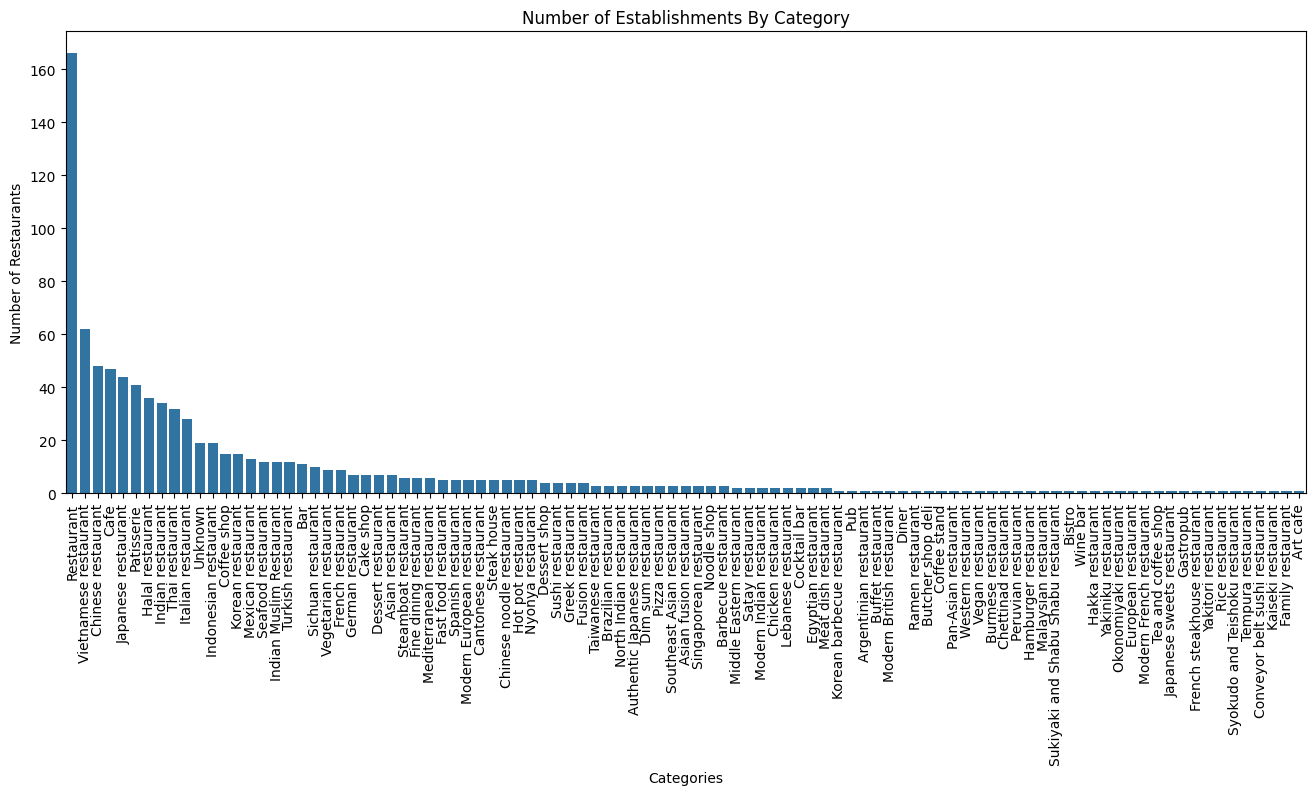

In [90]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

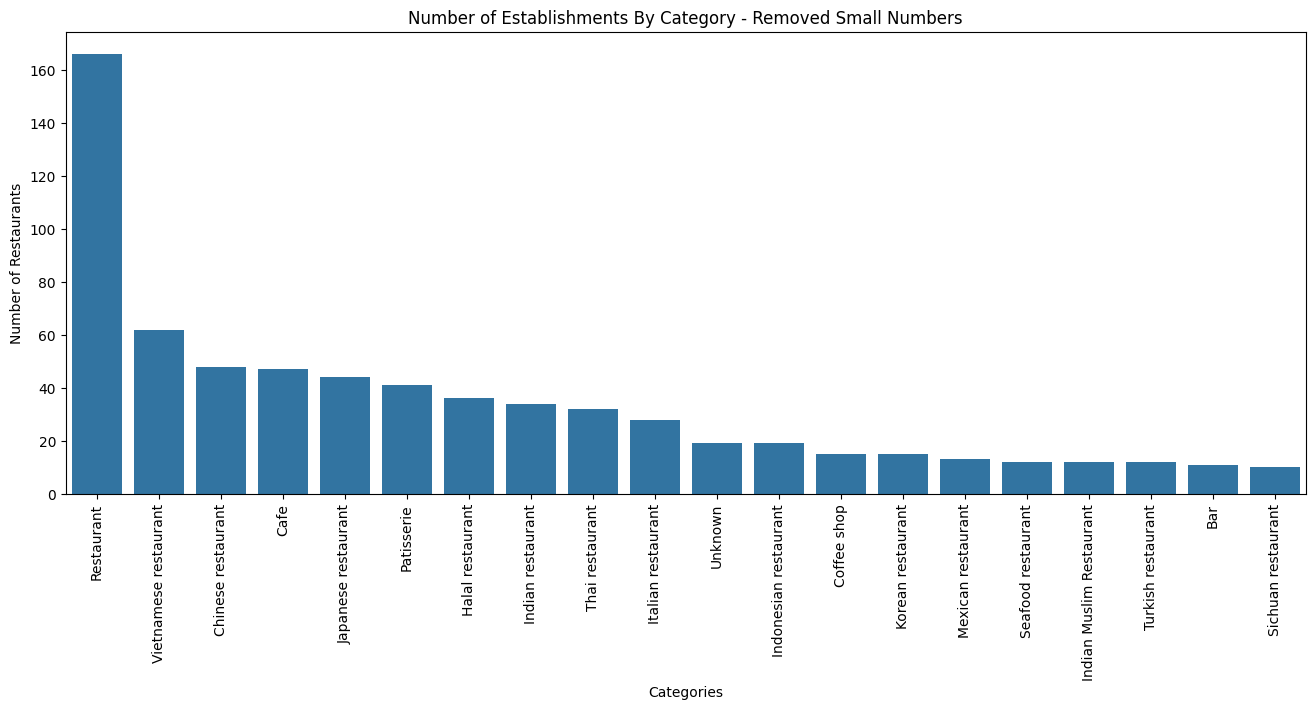

In [92]:
plt.figure(figsize=(16,6)) 
sns.countplot(data=restaurants, x='main_category', order=num_restaurants_by_categories_cut.index)
plt.xticks(rotation=90)
plt.title('Number of Establishments By Category - Removed Small Numbers')
plt.xlabel('Categories')
plt.ylabel('Number of Restaurants')
plt.show()

### Rating & Reviews by Category

In [97]:
restaurants_cut = restaurants[restaurants['main_category'].isin(num_restaurants_by_categories_cut.index)]

In [98]:
mean_ratings_by_category = restaurants_cut.groupby('main_category')['main_rating'].mean().sort_values(ascending=False)
mean_ratings_by_category

main_category
Turkish restaurant          4.591667
Italian restaurant          4.432143
Vietnamese restaurant       4.387097
Bar                         4.372727
Mexican restaurant          4.338462
Korean restaurant           4.286667
Seafood restaurant          4.216667
Restaurant                  4.193976
Indian restaurant           4.164706
Cafe                        4.131915
Japanese restaurant         4.081818
Chinese restaurant          4.077083
Thai restaurant             4.071875
Halal restaurant            4.066667
Sichuan restaurant          4.040000
Patisserie                  3.975610
Indonesian restaurant       3.926316
Coffee shop                 3.793333
Indian Muslim Restaurant    3.700000
Unknown                     0.673684
Name: main_rating, dtype: float64

In [100]:
total_reviews_by_category = restaurants_cut.groupby('main_category')['reviews'].sum().sort_values(ascending=False)
total_reviews_by_category

main_category
Restaurant                  86276
Vietnamese restaurant       30110
Halal restaurant            27513
Cafe                        27506
Chinese restaurant          23016
Indian restaurant           22922
Japanese restaurant         19142
Turkish restaurant          18124
Indian Muslim Restaurant    17934
Thai restaurant             14988
Italian restaurant          14905
Korean restaurant           12770
Mexican restaurant          11750
Indonesian restaurant        9115
Seafood restaurant           7918
Sichuan restaurant           4731
Patisserie                   3852
Bar                          3277
Coffee shop                  2200
Unknown                         8
Name: reviews, dtype: int64

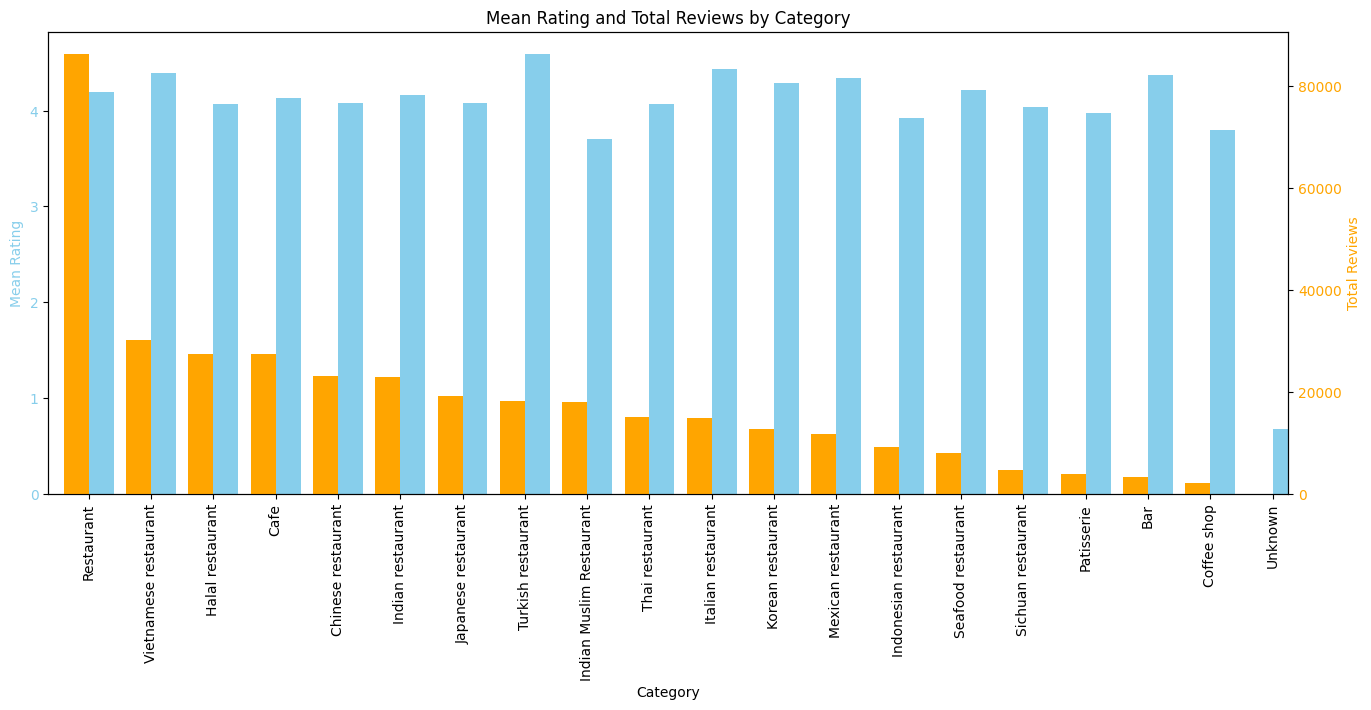

In [103]:
sorted_index = total_reviews_by_category.sort_values(ascending=False).index
mean_ratings_sorted = mean_ratings_by_category.reindex(sorted_index)
total_reviews_sorted = total_reviews_by_category.reindex(sorted_index)

fig, ax1 = plt.subplots(figsize=(16, 6))
mean_ratings_sorted.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4)
ax1.set_xlabel('Category')
ax1.set_ylabel('Mean Rating', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Mean Rating and Total Reviews by Category')
ax1.set_xticklabels(mean_ratings_sorted.index, rotation=90)

ax2 = ax1.twinx()
total_reviews_sorted.plot(kind='bar', ax=ax2, color='orange', position=1, width=0.4)
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.show()